**Zachary Inn**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.model_selection import train_test_split # simple TT split cv
from heapq import nsmallest

#Import all datasets

In [2]:
NT928 = pd.read_csv("https://raw.githubusercontent.com/ZacharyInn/WreckingYardData/main/CSVFiles/NateTrain928.csv")

NT53 = pd.read_csv("https://raw.githubusercontent.com/ZacharyInn/WreckingYardData/main/CSVFiles/NateTrain53.csv")

NW = pd.read_csv("https://raw.githubusercontent.com/ZacharyInn/WreckingYardData/main/CSVFiles/NateWood517.csv")

MW913 = pd.read_csv("https://raw.githubusercontent.com/ZacharyInn/WreckingYardData/main/CSVFiles/MagnusWood913.csv")

MW418 = pd.read_csv("https://raw.githubusercontent.com/ZacharyInn/WreckingYardData/main/CSVFiles/MagnusWood418.csv")

# Introduction
Baseball is an evolving game that has seen training methods come and go as players and coaches try to find methods to gain a competitive edge. One tool that players can thrive off of is generating high exit velocities, a sign of power and bat speed. As a result, a growing trend has emerged in recent years: the utilization of heavy training bats. These specialized bats, designed to challenge a player's strength and swing mechanics, have garnered considerable attention and intrigue within the baseball community.

The concept behind heavy training bats is simple yet profound. By incorporating additional weight into the bat, hitters are forced to exert greater force and effort during their swings. The aim is to develop greater bat speed, strength, and overall power, ultimately translating into higher exit velocities when using a standard game bat. Proponents of heavy training bats argue that this unique training method can significantly enhance a player's offensive performance, providing them with a competitive advantage on the field.

In this dataset, I used the HitTrax data of two highschool freshman: Nate and Magnus. Nate is about 5'9 with a skinnier build who utilized the training bat while Magnus is 6'0 with a thicker build that has never used a training bat. I compared their exit velocities and distances from 9/13/2022 and contrasted them with their data from their most recent lessons which were in May and April respectively. The question I am trying to answer is this: Do training bats have a significant impact on a player's exit velocity?

#Graphs comparing the exit velocity and distance of each pitch, colored by each outcome

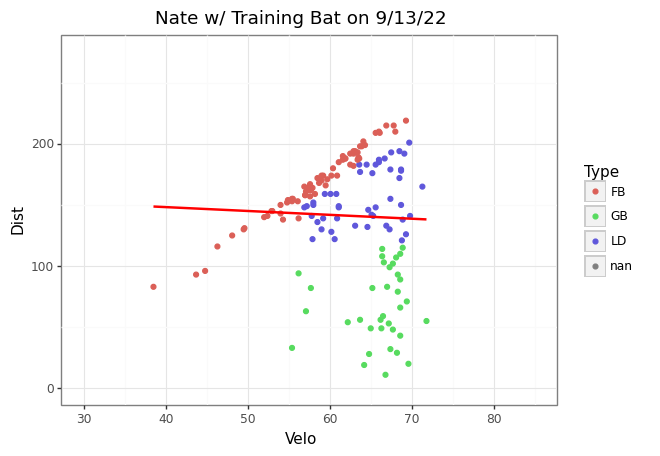

<ggplot: (8789824494659)>

In [3]:
ggplot(NT928, aes(x = "Velo", y = "Dist", color='Type')) + geom_point() + theme_bw() + geom_smooth(method='lm',  se=False, color = "red") + xlim(30, 85) + ylim(0, 275) + ggtitle("Nate w/ Training Bat on 9/13/22")

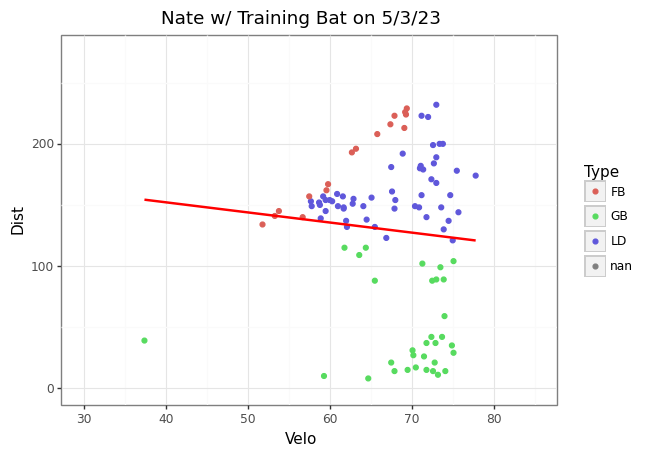

<ggplot: (8789822234582)>

In [4]:
ggplot(NT53, aes(x = "Velo", y = "Dist", color='Type')) + geom_point() + theme_bw() + geom_smooth(method='lm',  se=False, color = "red") + xlim(30, 85) + ylim(0, 275) + ggtitle("Nate w/ Training Bat on 5/3/23")

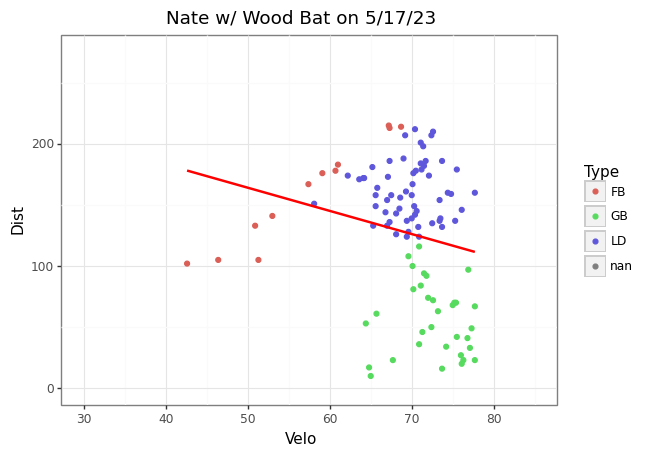

<ggplot: (8789822259276)>

In [5]:
ggplot(NW, aes(x = "Velo", y = "Dist", color='Type')) + geom_point() + theme_bw() + geom_smooth(method='lm',  se=False, color = "red") + xlim(30, 85) + ylim(0, 275) + ggtitle("Nate w/ Wood Bat on 5/17/23")

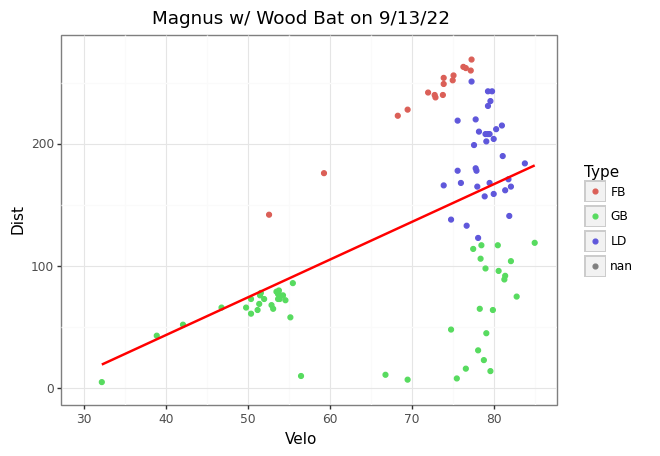

<ggplot: (8789888833383)>

In [6]:
ggplot(MW913, aes(x = "Velo", y = "Dist", color='Type')) + geom_point() + theme_bw() + geom_smooth(method='lm',  se=False, color = "red") + xlim(30, 85) + ylim(0, 275) + ggtitle("Magnus w/ Wood Bat on 9/13/22")

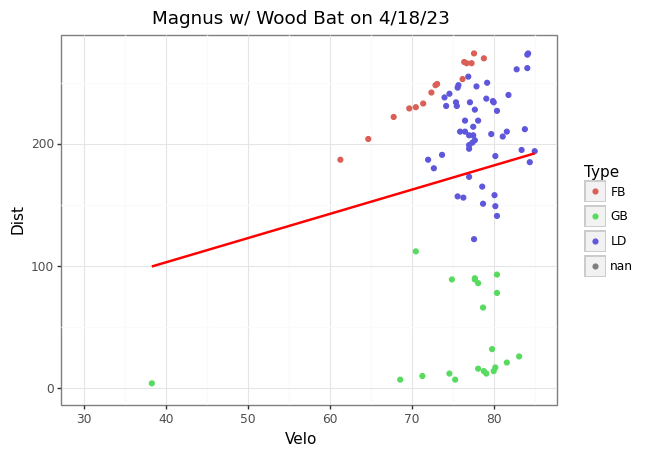

<ggplot: (8789822022008)>

In [7]:
ggplot(MW418, aes(x = "Velo", y = "Dist", color='Type')) + geom_point() + theme_bw() + geom_smooth(method='lm',  se=False, color = "red") + xlim(30, 85) + ylim(0, 275) + ggtitle("Magnus w/ Wood Bat on 4/18/23")

**A note on these graphs:**

I included a linear regression line (the red line) in all of these graphs to see what the general relationship between the exit velocity and distance for each lesson was.

**Nate's results:**

His initial lesson that took place in September 2022 was his first with the ~40 oz training bat and you can definitely see the difficulty spike for him as a majority of his batted balls were weakly hit fly balls and ground balls. Nothing was hit over 75mph and only a couple were hit over 70mph. There is a slight negative linear relationship in the first graph showing that there is slight but inconlusive data on the relationship betwen exit velocity and distance. This usually means that exit velocity had almost no impact on distance in this instance.

We then move on to Nate's two lessons in May of 2023 where the most obvious trend you can notice is that he cut down on his fly balls a lot since September. In his two May lessons, he has 16 or less fly balls in each and thus upped his line drives and ground balls. The other most noticeable trend, in terms of training bats, is that his general floor for exit velocity increased from ~55mph to ~58mph and his max exit velocity increased from ~71mph to ~78mph.

When given a normal wooden bat, Nate's numbers look significantly improved as a majority of his batted balls were line drives and they all generally hovered between ~61mph and ~78mph. Interestingly enough, his max exit velocities with the training bat and the regular wood one were very similar, but his floor was much higher with the normal wooden bat as opposed to the training bat.

The linear regression line on Nate's results continually got steeper in the negative direction showing a negative relationship between exit velocity and distance for Nate. Basically as he hits the ball harder, he tends to hit the ball not as far. This makes sense for Nate since he is not a power hitter and his flyballs are usually not hit far enough to create success. I wanted to expand on the idea of Nate's launch angle so below I created a graph coloring by his launch angles to see if I could get a better idea as to what is going on.

**Magnus's results:**

Magnus has never used a training bat for a couple of reasons such as the emphasis of his lessons being to correct mistakes in his swing that could be rendered more difficult if given a heavier bat. Nevertheless, he has never used a training bat and I wanted to use him as a control group to see what changes he has made in terms of his exit velocity in about the same amount of time as Nate. A couple notes: Magnus is a stronger kid than Nate is and about a year older and while the inital lessons for both kids are on the same day, Magnus's last lesson was in April of 2023.

Magnus's first lesson had him hitting a ton of ground balls (could be the result of a drill) and having a majority of his exit velocities hover between ~70mph and ~80mph. There is a strong positive linear relationship in his first lesson, greatly suggesting that Magnus's strong suit would be to elevate the ball more. 

Then in Magnus's most recent lesson in April 2023, the most noticeable difference is his dramatic increase in line drives with over 200 ft of distance. This would suggest that his swing path and launch angle have significantly improved since line drives are generally the best batted ball outcome in terms of batting average. An interesting point that I would like to make is that Magnus's max exit velocity remained the same between these two samples while his floor decresed slightly from ~73mph to ~71mph. 

I would like to claim that since Magnus is a stronger kid than Nate that the emphasis shouldn't be on his exit velocity but his swing path to ensure that he hits more fly balls and line drives with authority, but it is interesting how Magnus's exit velocities almost remained constant from September 2022 to April 2023. On the other hand, Nate increased his max exit velocity using the training bat from ~72mph to ~78mph and increased his exit velocity floor from ~55mph to ~58mph. Both also increased their line drive rate from their initial lesson in September, so I would make the claim that the training bats DO help in terms of training exit velocities.

#Graph comparing Nate's exit velocity to distance, colored by launch angle

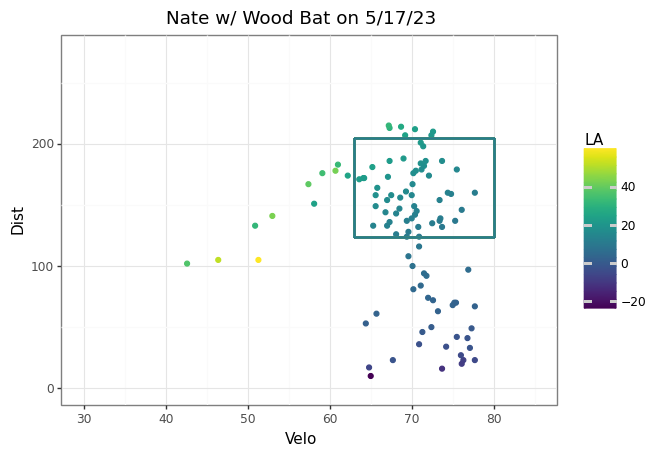

<ggplot: (8789822129222)>

In [8]:
ggplot(NW, aes(x = "Velo", y = "Dist", color='LA')) + geom_point() + theme_bw() + xlim(30, 85) + ylim(0, 275) + ggtitle("Nate w/ Wood Bat on 5/17/23") + geom_rect(xmin = 63, xmax = 80,   ymin = 124, ymax = 205, alpha=0)

The graph above is the same graph as the one in May, but colored by launch angle instead of outcome. I took Nate's data with a wood bat in May and created a rectangle in the graph that I call the "Goldilocks Zone." Inside this rectancle is a majority of Nate's best outcomes which included a majority of line drives that resulted in base hits according to HitTrax. According to this graph, Nate's ideal launch angle is between 17-25 degrees. He can get away with ~14 and ~30 degrees but between 17-25 degrees has all but one negative outcome so I suggest that he stay within that range.

#Graph comparing Nate's exit velocity to distance, colored by launch angle

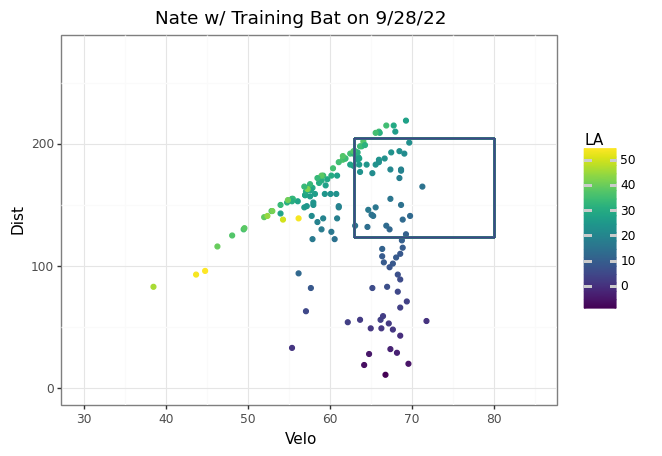

<ggplot: (8789821965306)>

In [9]:
ggplot(NT928, aes(x = "Velo", y = "Dist", color='LA')) + geom_point() + theme_bw() + xlim(30, 85) + ylim(0, 275) + ggtitle("Nate w/ Training Bat on 9/28/22") + geom_rect(xmin = 63, xmax = 80,   ymin = 124, ymax = 205, alpha=0)

Lastly, I included this graph of the same goldilocks zone just to showcase the improvement that Nate has made since September 2022. Just comparing to the initial graph you can see that the rectangle above is less populated than the initial one. The most glaring difference is that the rectangle is only populated on the left side, suggesting that Nate has made significant improvements in his exit velocities. Another minor detail that may go unnoticed is that in the upper parts of the rectangle, the launch angles are higher than the ones in the initial graph, telling that Nate had to hit the ball at a much higher launch angle to achieve the same distances that he can now reach with line drives. 

#Conclusion

Nate's exit veloctiy stats greatly benefitted from utilizing the training bats as both his floor and max exit velocity increased throughout the 7 months. On the other hand, Mangus's exit velocity seems to have remained constant throughout the 6 months. Both players saw an increase in line drives which is almost certainly the result of mechanical changes made within this time period. While Mangus's exit velocities haven't changed much, his larger build shifts the focus of his training away from exit velocity to launch angle as he hits the ball hard naturally and just needs to hit more line drives rather than ground balls in order to maximize his in-game potential. Nate's rather lighter build caused a bit of concern over exit velocities which is why the training bat made sense. Part of the increase in exit velocities could be attributed to physical maturity, although I believe that there is no doubt that the added weight and repeated use of the training bats have accelerated Nate's strength and bat speed. 

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Effectiveness of Weighted Training Bats.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Effectiveness of Weighted Training Bats.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g